# Wine project pre-processing

In [69]:
import pandas as pd
import requests
import json
import numpy as np
import datetime
import time
import tweepy
import re
import seaborn as sns
from statistics import mean
  
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('..\Data\winemag-data-130k-v2.csv', index_col=0)

## Extract information from title

In [3]:
titles = df[['title']].values.tolist()
titles = [item for sublist in titles for item in sublist]
titles

['Nicosia 2013 Vulkà Bianco  (Etna)',
 'Quinta dos Avidagos 2011 Avidagos Red (Douro)',
 'Rainstorm 2013 Pinot Gris (Willamette Valley)',
 'St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore)',
 "Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley)",
 'Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra)',
 'Terre di Giurfo 2013 Belsito Frappato (Vittoria)',
 'Trimbach 2012 Gewurztraminer (Alsace)',
 'Heinz Eifel 2013 Shine Gewürztraminer (Rheinhessen)',
 'Jean-Baptiste Adam 2012 Les Natures Pinot Gris (Alsace)',
 'Kirkland Signature 2011 Mountain Cuvée Cabernet Sauvignon (Napa Valley)',
 'Leon Beyer 2012 Gewurztraminer (Alsace)',
 'Louis M. Martini 2012 Cabernet Sauvignon (Alexander Valley)',
 'Masseria Setteporte 2012 Rosso  (Etna)',
 'Mirassou 2012 Chardonnay (Central Coast)',
 'Richard Böcking 2013 Devon Riesling (Mosel)',
 'Felix Lavaque 2010 Felix Malbec (Cafayate)',
 'Gaucho Andino 2011 Winemaker Selection Malbec (Mendoza)',
 'Prad

In [4]:
producer = []
years = []
vineyard_grape = []
region = []

for title in titles:
    #print(title)
    result = re.match(r'(\w.+) (\d*) ([^(]+) (\(.*\))', title)
    if result:
        #print(result.groups())
        producer.append(result.group(1))
        years.append(result.group(2))
        vineyard_grape.append(result.group(3))
        region.append(result.group(4)[1:-1])
    else:
        producer.append(0)
        years.append(0)
        vineyard_grape.append(0)
        region.append(0)

df['producer'] = producer
df['year'] = years
df['vineyard_grape'] = vineyard_grape
df['region_from_name'] = region

In [5]:
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,producer,year,vineyard_grape,region_from_name
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Nicosia,2013,Vulkà Bianco,Etna
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Quinta dos Avidagos,2011,Avidagos Red,Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Rainstorm,2013,Pinot Gris,Willamette Valley
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,St. Julian,2013,Reserve Late Harvest Riesling,Lake Michigan Shore
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Sweet Cheeks,2012,Vintner's Reserve Wild Child Block Pinot Noir,Willamette Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef),2013,Brauneberger Juffer-Sonnenuhr Spätlese Riesling,Mosel
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,Citation,2004,Pinot Noir,Oregon
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,Domaine Gresser,2013,Kritt Gewurztraminer,Alsace
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,Domaine Marcel Deiss,2012,Pinot Gris,Alsace


<AxesSubplot: xlabel='Count', ylabel='variable'>

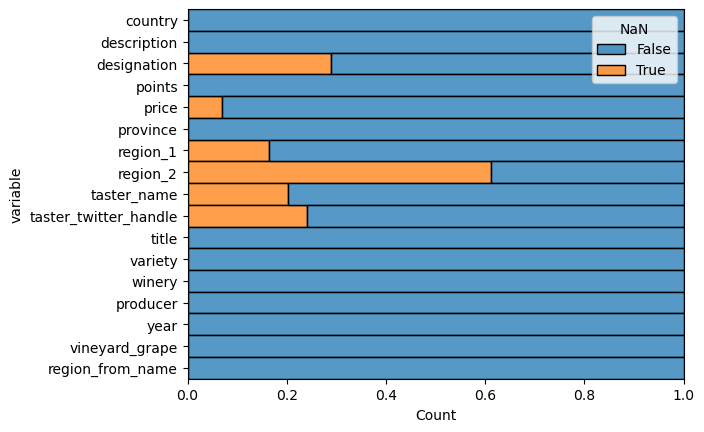

In [9]:
sns.histplot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill"
)

## Get number of followers of the rating person

In [10]:
df['taster_twitter_handle']

0         @kerinokeefe
1           @vossroger
2          @paulgwine 
3                  NaN
4          @paulgwine 
              ...     
129966             NaN
129967     @paulgwine 
129968      @vossroger
129969      @vossroger
129970      @vossroger
Name: taster_twitter_handle, Length: 129971, dtype: object

In [11]:
# Enter your Twitter API credentials
bearer_token = "AAAAAAAAAAAAAAAAAAAAAPb4lQEAAAAAWvSoI7rh96mCKeQDRBwJzrTTk1U%3DpA4OGY28SYCZ4Jg9iXSqTsNgqtwCQzO86w0tUpSaJsJfiKHikN"

In [12]:
def getFollowerCount(handle):
    client = tweepy.Client(bearer_token)

    # Get the follower count of a Twitter handle
    user_ids = [handle]
    response = client.get_users(usernames=user_ids, user_fields=["public_metrics"])    

    if (response.data):
        for user in response.data:
            return user.public_metrics['followers_count']
    else:
        print('Not found: ' + handle)
        return 0

In [13]:
handles = df[['taster_twitter_handle']].values.tolist()
handles

[['@kerinokeefe'],
 ['@vossroger'],
 ['@paulgwine\xa0'],
 [nan],
 ['@paulgwine\xa0'],
 ['@wineschach'],
 ['@kerinokeefe'],
 ['@vossroger'],
 [nan],
 ['@vossroger'],
 ['@vboone'],
 ['@vossroger'],
 ['@vboone'],
 ['@kerinokeefe'],
 ['@mattkettmann'],
 [nan],
 ['@wineschach'],
 ['@wineschach'],
 ['@wineschach'],
 [nan],
 [nan],
 ['@paulgwine\xa0'],
 ['@kerinokeefe'],
 ['@mattkettmann'],
 ['@kerinokeefe'],
 ['@vboone'],
 ['@kerinokeefe'],
 ['@kerinokeefe'],
 ['@kerinokeefe'],
 ['@vboone'],
 ['@vossroger'],
 [nan],
 [nan],
 [nan],
 [nan],
 ['@paulgwine\xa0'],
 ['@wineschach'],
 [nan],
 [nan],
 [nan],
 [nan],
 ['@paulgwine\xa0'],
 ['@vossroger'],
 [nan],
 ['@wineschach'],
 [nan],
 [nan],
 [nan],
 [nan],
 ['@vossroger'],
 [nan],
 ['@wineschach'],
 [nan],
 ['@vossroger'],
 [nan],
 [nan],
 ['@vboone'],
 [nan],
 ['@wineschach'],
 ['@wawinereport'],
 ['@vboone'],
 ['@kerinokeefe'],
 ['@wawinereport'],
 ['@vossroger'],
 ['@mattkettmann'],
 ['@vossroger'],
 ['@vossroger'],
 ['@wawinereport'],
 ['@g

In [17]:
dict = {}
followers = []

for handle in handles:
    value = handle[0]
    #print(value)

    try:
        result = re.match(r'@(\w+)', value)
    except:
        print('error during parsing')
        followers.append(pd.NA)
        continue;

    if result:
        correct_handle = result.group(1)
        #print(correct_handle)
        if (correct_handle in dict):
            follower_count = dict[correct_handle]
            followers.append(follower_count)
        else:
            follower_count = getFollowerCount(correct_handle)
            dict[correct_handle] = follower_count
            followers.append(follower_count)

df['followers'] = followers

Not found: paulgwine
error during parsing
Not found: wineschach
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
Not found: wawinereport
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error during parsing
error dur

In [18]:
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,producer,year,vineyard_grape,region_from_name,followers
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Nicosia,2013,Vulkà Bianco,Etna,7538
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Quinta dos Avidagos,2011,Avidagos Red,Douro,1154
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Rainstorm,2013,Pinot Gris,Willamette Valley,0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,St. Julian,2013,Reserve Late Harvest Riesling,Lake Michigan Shore,<NA>
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Sweet Cheeks,2012,Vintner's Reserve Wild Child Block Pinot Noir,Willamette Valley,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef),2013,Brauneberger Juffer-Sonnenuhr Spätlese Riesling,Mosel,<NA>
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,Citation,2004,Pinot Noir,Oregon,0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,Domaine Gresser,2013,Kritt Gewurztraminer,Alsace,1154
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,Domaine Marcel Deiss,2012,Pinot Gris,Alsace,1154


<AxesSubplot: xlabel='Count', ylabel='variable'>

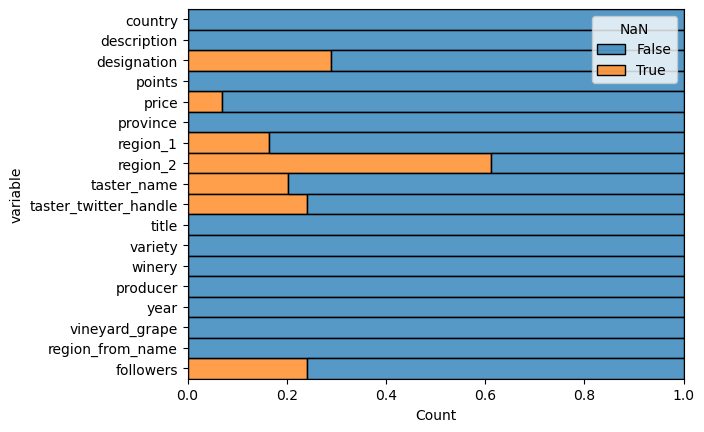

In [19]:
sns.histplot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill"
)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  producer               129971 non-null  object 
 14  year                   129971 non-nu

In [20]:
df.to_csv('..\Data\winemag-data-130k-v2+extract.csv', sep=';')

## Get weather information

Die klimatischen Minimalanforderungen für den Weinbau liegen bei einer mittleren Jahrestemperatur von mindestens 9 Grad Celsius, einer Durchschnittstemperatur des wärmsten Monats von mindestens 18 Grad Celsius, einer maximalen Tiefsttemperatur im Winter von minus 13 Grad Celsius, mindestens 1.300 Sonnenstunden pro Jahr, einer jährlichen Niederschlagsmenge von mindestens 500 mm (in warmem Klima mindestens 750 mm) sowie einer Vegetationsperiode (der Zeit zwischen dem letzten und dem ersten Frost) von mindestens 180 Tagen. Die optimale Temperatur für das Traubenwachstum beträgt zwischen 25 und 28 Grad Celsius. Die Temperatur hängt maßgeblich davon ab, in welcher Höhe die Reben stehen; als Faustregel gilt, dass die Temperatur pro 100 Meter Höhenunterschied aufwärts um 0,6 Grad sinkt.

In [22]:
apikey = '02a31fd84c7c21a1119ad4a77fe43e6f'

In [52]:
df = pd.read_csv('..\Data\winemag-data-130k-v2+extract.csv', index_col=0, delimiter=';')

In [54]:
df = df[['country', 'province', 'region_1']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   country   129908 non-null  object
 1   province  129908 non-null  object
 2   region_1  108724 non-null  object
dtypes: object(3)
memory usage: 4.0+ MB


In [55]:
def getGeo(url):
    response = requests.get(url)
    data_str = response.json()
    if (response.status_code != 200):
        print(data_str)
        return pd.NA, pd.NA
    elif (len(data_str) > 0):
        for entry in data_str:
            return entry['lat'], entry['lon']
    else:
        return pd.NA, pd.NA

In [56]:
def getTemp(url):
    response = requests.get(url)
    data_str = response.json()
    if (response.status_code != 200):
        #print(data_str)
        return pd.NA, pd.NA, pd.NA
    elif (len(data_str) > 0):
        return (data_str['result']['temp']['median'] - 273.15), (data_str['result']['humidity']['median']), (data_str['result']['wind']['median'])
    else:
        return pd.NA, pd.NA, pd.NA

In [57]:
dict = {}
lats = []
lons = []

for index, row in df.iterrows():
    country = row['country']
    province = row['province']
    region = row['region_1']

    url = "http://pro.openweathermap.org/geo/1.0/direct?q="
    if (pd.isna(country) is False):
        url += str(country) + ","

    if (pd.isna(province) is False):
        url += str(province) + ","
    
    if (url[-1] == ','):
        url = url[:-2]

    url += "&limit=1&appid=" + apikey
    
    if (url in dict):
        lat, lon = dict[url]
        #print('got from dict:' + str(lat) + "," + str(lon))
    else:
        lat, lon = getGeo(url)
        dict[url] = (lat, lon)
        #print('got from url:' + str(lat) + "," + str(lon))
    
    lats.append(lat)
    lons.append(lon)

df['lat'] = lats
df['lon'] = lons

{'cod': '400', 'message': 'Nothing to geocode'}


C:\Users\lukas\AppData\Local\Temp\ipykernel_22108\156647870.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'] = lats
C:\Users\lukas\AppData\Local\Temp\ipykernel_22108\156647870.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lon'] = lons


<AxesSubplot: xlabel='Count', ylabel='variable'>

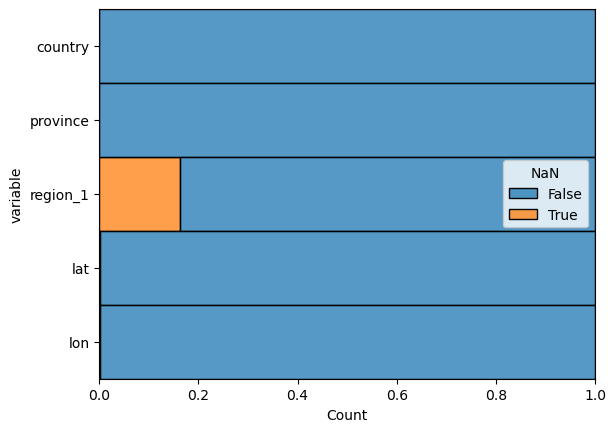

In [58]:
sns.histplot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill"
)

In [59]:
df.isna().sum()

country        63
province       63
region_1    21247
lat           265
lon           265
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   country   129908 non-null  object
 1   province  129908 non-null  object
 2   region_1  108724 non-null  object
 3   lat       129706 non-null  object
 4   lon       129706 non-null  object
dtypes: object(5)
memory usage: 5.9+ MB


In [61]:
df.to_csv('..\Data\winemag-data-130k-v2+geo.csv', sep=';')

In [80]:
df = pd.read_csv('..\Data\winemag-data-130k-v2+geo.csv', index_col=0, delimiter=';')

In [81]:
df = df[:5000]
df

,country,province,region_1,lat,lon
0,Italy,Sicily & Sardinia,Etna,32.184038,-96.884719
1,Portugal,Douro,NaN,-1.629263,-45.236815
2,US,Oregon,Willamette Valley,49.100945,1.967247
3,US,Michigan,Lake Michigan Shore,49.100945,1.967247
4,US,Oregon,Willamette Valley,49.100945,1.967247
...,...,...,...,...,...
4995,New Zealand,Marlborough,NaN,46.409990,-62.313043
4996,Italy,Southern Italy,Campania,32.184038,-96.884719
4997,Italy,Sicily & Sardinia,Marsala,32.184038,-96.884719
4998,US,California,Sonoma-Napa,49.100945,1.967247


In [83]:
dict = {}
temps = []
tempMin = []
tempMax = []
humidities = []
winds = []
location = []

for index, row in df.iterrows():
    lat = row['lat']
    lon = row['lon']

    if (pd.isna(lat) and pd.isna(lon)):
        temps.append(pd.NA)
        tempMin.append(pd.NA)
        tempMax.append(pd.NA)
        humidities.append(pd.NA)
        winds.append(pd.NA)
        location.append(pd.NA)
        continue

    date_time_start = datetime(2022, 1, 7, 13, 00)
    unix_time_start = time.mktime(date_time_start.timetuple())

    # check if location is in north or south of the earth
    monthRange = [4,5,6,7,8,9,10]
    if (lat >= 0):
        location.append(1)
    else:
        monthRange = [10,11,12,1,2,3,4]
        location.append(0)

    # with our subscription we can only get data from last year.
    tempList = []
    humidityList = []
    windList = []
    for month in monthRange:
        url = "https://history.openweathermap.org/data/2.5/aggregated/month?lat="+str(round(lat, 2))+"&lon="+str(round(lon, 2))+"&month=" + str(month) + "&units=metric&appid=" + apikey
    
        if (url in dict):
            temp, humidity, wind = dict[url]
            #print('got from dict:' + str(lat) + "," + str(lon))
        else:
            temp, humidity, wind = getTemp(url)
            dict[url] = (temp, humidity, wind)
            #print('got from url:' + str(lat) + "," + str(lon))
        
        tempList.append(temp)
        humidityList.append(humidity)
        windList.append(wind)

    temps.append(mean(tempList))
    tempMin.append(min(tempList))
    tempMax.append(max(tempList))
    humidities.append(mean(humidityList))
    winds.append(mean(windList))

df['temp'] = temps
df['tempMin'] = tempMin
df['tempMax'] = tempMax
df['humidity'] = humidities
df['wind'] = winds
df['location'] = location
df

,country,province,region_1,lat,lon,temp,tempMin,tempMax,humidity,wind,location
0,Italy,Sicily & Sardinia,Etna,32.184038,-96.884719,25.014286,18.9,29.58,62.571429,3.547143,1
1,Portugal,Douro,NaN,-1.629263,-45.236815,27.428571,27.0,28.0,77.714286,4.03,0
2,US,Oregon,Willamette Valley,49.100945,1.967247,15.975714,10.9,20.4,70.714286,2.968571,1
3,US,Michigan,Lake Michigan Shore,49.100945,1.967247,15.975714,10.9,20.4,70.714286,2.968571,1
4,US,Oregon,Willamette Valley,49.100945,1.967247,15.975714,10.9,20.4,70.714286,2.968571,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,New Zealand,Marlborough,NaN,46.409990,-62.313043,12.035714,2.16,19.0,85.142857,4.01,1
4996,Italy,Southern Italy,Campania,32.184038,-96.884719,25.014286,18.9,29.58,62.571429,3.547143,1
4997,Italy,Sicily & Sardinia,Marsala,32.184038,-96.884719,25.014286,18.9,29.58,62.571429,3.547143,1
4998,US,California,Sonoma-Napa,49.100945,1.967247,15.975714,10.9,20.4,70.714286,2.968571,1


In [84]:
df.to_csv('..\Data\winemag-data-130k-v2+temp.csv', sep=';')

In [ ]:
#df = df = pd.read_csv('..\Data\winemag-data-130k-v2+geo.csv', index_col=0, delimiter=';')
#df

## Extract attributes from description

In [63]:
df = pd.read_csv('..\Data\winemag-data-130k-v2+extract.csv', index_col=0, delimiter=';')
df_words = pd.read_csv('..\Process\wordlist_output.csv', delimiter=';')

In [64]:
df_words.sort_values('total', ascending=False, inplace=True)
df_words.reset_index(drop=True, inplace=True)
df_words

,word,in_documents,total
0,fruit,33,36
1,acidity,29,30
2,black,24,29
3,aromas,27,27
4,cherry,23,26
5,tannins,25,25
6,oak,16,19
7,ripe,18,18
8,white,12,15
9,red,14,14


In [65]:
descriptions = df[['description']].values.tolist()

In [66]:
dict = {}
words = []

for description in descriptions:
    attributes = []
    for word in df_words['word']:
        if word in description[0]:
            attributes.append(word)

    words.append(attributes)

words

[['fruit', 'acidity', 'ripe'],
 ['fruit', 'acidity', 'tannins', 'ripe', 'red'],
 ['acidity'],
 ['aromas', 'dry'],
 [],
 ['fruit', 'acidity', 'aromas', 'dark', 'plum', 'bodied', 'full'],
 ['acidity', 'aromas', 'tannins', 'white', 'red', 'bright'],
 ['acidity', 'spice', 'dry'],
 ['fruit', 'dry'],
 ['fruit', 'acidity', 'spice', 'dry'],
 ['oak', 'plum'],
 ['red', 'dry'],
 ['black', 'cherry', 'oak', 'red', 'rich'],
 ['aromas', 'tannins', 'oak', 'plum', 'dry'],
 ['ripe'],
 ['dry'],
 ['acidity', 'aromas', 'oak', 'red', 'plum'],
 ['fruit', 'black', 'aromas', 'cherry', 'oak', 'dark'],
 ['fruit', 'black', 'aromas', 'oak', 'red', 'spice', 'bodied', 'full'],
 ['fruit', 'aromas', 'cherry', 'ripe', 'plum', 'blend'],
 ['black', 'aromas', 'oak', 'red', 'dark'],
 ['oak'],
 ['fruit', 'acidity', 'aromas', 'white', 'bright'],
 ['acidity', 'black', 'aromas', 'red', 'plum'],
 ['black', 'cherry', 'tannins', 'oak', 'dry'],
 ['black', 'aromas', 'spice', 'bodied', 'full'],
 ['fruit', 'acidity', 'aromas', 'oak',

In [67]:
df['desc'] =  [','.join(ele) for ele in words]
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,producer,year,vineyard_grape,region_from_name,followers,desc
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Nicosia,2013.0,Vulkà Bianco,Etna,7538.0,"fruit,acidity,ripe"
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Quinta dos Avidagos,2011.0,Avidagos Red,Douro,1154.0,"fruit,acidity,tannins,ripe,red"
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Rainstorm,2013.0,Pinot Gris,Willamette Valley,0.0,acidity
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,St. Julian,2013.0,Reserve Late Harvest Riesling,Lake Michigan Shore,NaN,"aromas,dry"
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Sweet Cheeks,2012.0,Vintner's Reserve Wild Child Block Pinot Noir,Willamette Valley,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef),2013.0,Brauneberger Juffer-Sonnenuhr Spätlese Riesling,Mosel,NaN,"fruit,acidity,sweet"
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,Citation,2004.0,Pinot Noir,Oregon,0.0,"fruit,cherry,red,full"
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,Domaine Gresser,2013.0,Kritt Gewurztraminer,Alsace,1154.0,"fruit,ripe,spice,dry"
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,Domaine Marcel Deiss,2012.0,Pinot Gris,Alsace,1154.0,"acidity,spice,dry"


In [68]:
df.to_csv('..\Data\winemag-data-130k-v2+extract.csv', sep=';')